In [8]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms

import numpy as np
from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
data_transforms = transforms.Compose([
        transforms.CenterCrop((384, 512)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    ])

In [3]:
from inceptionresnetv2 import inceptionresnetv2
class model_qa(nn.Module):
    def __init__(self,num_classes,**kwargs):
        super(model_qa,self).__init__()
        base_model = inceptionresnetv2(num_classes=1000, pretrained='imagenet')
        self.base= nn.Sequential(*list(base_model.children())[:-1])
        self.fc = nn.Sequential(
            nn.Linear(1536, 2048),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(2048),
            nn.Dropout(p=0.25),
            nn.Linear(2048, 1024),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(1024),
            nn.Dropout(p=0.25),
            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(256),         
            nn.Dropout(p=0.5),
            nn.Linear(256, num_classes),
        )

    def forward(self,x):
        x = self.base(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [6]:
'''
Please follow the instructions in the GitHub page to download the pre-trained model:
https://github.com/multimediaeval/2020-Pixel-Privacy-Task
'''

KonCept512 = model_qa(num_classes=1) 
KonCept512.load_state_dict(torch.load('./KonCept512.pth'))
KonCept512.eval().to(device)

model_qa(
  (base): Sequential(
    (0): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (2): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
 

In [29]:
img_path = '../pp2020_dev/10990887046.jpg'
score = KonCept512(data_transforms(Image.open(img_path).convert('RGB')).unsqueeze(0).to(device)).detach().cpu().numpy()[0][0]
print('The BIQA score of image `{}` is {}'.format(img_path, score))

The BIQA score of image `../pp2020_dev/10990887046.jpg` is 58.59065246582031


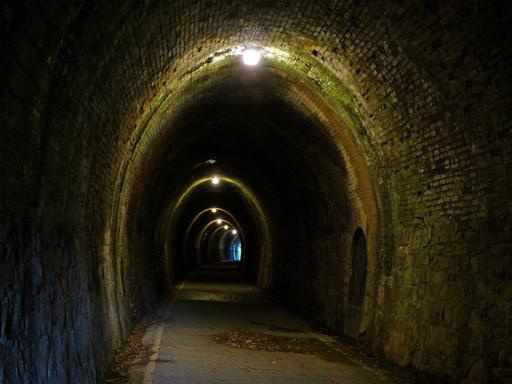

In [30]:
Image.open(img_path)